In [1]:
import pandas as pd
df = pd.read_csv('../z20_data/drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,AS
1,Albania,89.0,132.0,54.0,4.9,EU
2,Algeria,25.0,0.0,14.0,0.7,AF
3,Andorra,245.0,138.0,312.0,12.4,EU
4,Angola,217.0,57.0,45.0,5.9,AF
...,...,...,...,...,...,...
189,Vietnam,111.0,2.0,1.0,2.0,AS
190,Yemen,6.0,0.0,0.0,0.1,AS
191,Zambia,32.0,19.0,4.0,2.5,AF
192,Zimbabwe,64.0,18.0,4.0,4.7,AF


In [2]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [3]:
#대륙간 국가 갯수, 대륙간 국가 몇개 있는지 출력.
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [4]:
df[df['continent']=='AF'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25.0,0.0,14.0,0.7,AF
4,Angola,217.0,57.0,45.0,5.9,AF
18,Benin,34.0,4.0,13.0,1.1,AF
22,Botswana,173.0,35.0,35.0,5.4,AF
26,Burkina Faso,25.0,7.0,7.0,4.3,AF


In [7]:
#AF대륙에 속하는 국가의 맥주소비량을 출력.
df[df['continent'] == 'AF']['beer_servings'].head()

2      25.0
4     217.0
18     34.0
22    173.0
26     25.0
Name: beer_servings, dtype: float64

In [8]:
#대륙간 맥주 소비량 출력
df.groupby('continent')['beer_servings'].sum()

continent
AF    3258.0
AS    1630.0
EU    8720.0
OC    1435.0
SA    2101.0
Name: beer_servings, dtype: float64

In [12]:
#대륙별 평균 wine_serving 출력
df.groupby('continent')['wine_servings'].mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

In [13]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,AS
1,Albania,89.0,132.0,54.0,4.9,EU
2,Algeria,25.0,0.0,14.0,0.7,AF
3,Andorra,245.0,138.0,312.0,12.4,EU
4,Angola,217.0,57.0,45.0,5.9,AF


In [14]:
#상관관계 함수
df[['beer_servings','wine_servings']].corr(method='pearson')

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [15]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [16]:
#4개 모두 다 상관관계 행렬구현
cols=['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
df[cols].corr(method='pearson')

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [18]:
df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index

Index(['EU', 'AF', 'SA', 'AS', 'OC'], dtype='object', name='continent')

<BarContainer object of 3 artists>

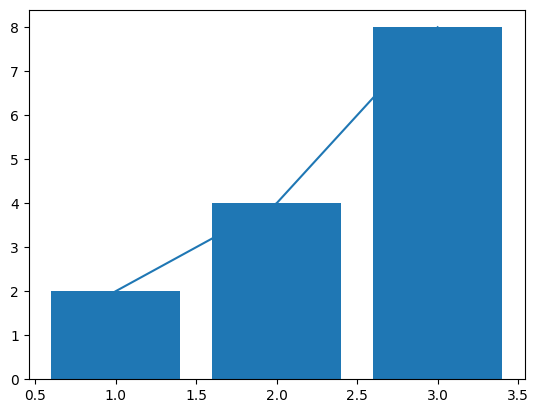

In [21]:
#대륙별 맥주소비량, 와인소비량 평균,최소, 최대,합계
#apply(): 함수호출, agg() 그룹함수 사용
df.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])

#맥주소비량이 가장 높은 대륙은 어떻게 되는지 출력하시오.
x=df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index
y=df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index
x
y
#막대그래프 대륙별 맥주소비량 그래프로 
import matplotlib.pyplot as plt
x=[1,2,3]
y=[2,4,8]
plt.plot(x,y)
plt.bar(x,y)

In [22]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [25]:
#AF, EU 맥주 소비량 출력
#차이를 출력
beer_af=df[df['continent']=='AF']['beer_servings'].sum()
beer_eu=df[df['continent']=='EU']['beer_servings'].sum()
beer_eu-beer_af

5462.0

In [26]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [ ]:
#컬럼의 모든 술의 총량을 출력
#totla_servings
df['total_servings']